## Semana 2

### Bibliotecas e dados brutos

In [368]:
# bibliotecas usadas:
import pandas as pd # manipulação dos dados
import seaborn as sns # gráficos

# opcional (ocutar alertas)
import warnings
warnings.filterwarnings('ignore')

In [369]:
# ler os dados
dados_brutos = pd.read_csv('tabela_aluracash.csv', sep=';')

#amostra dos dados brutos
dados_brutos.sample(5) 

,PESSOA,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,EMPRESTIMO,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,SOLICITACAO,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
26125,OI927Za4-gEIK,42.0,26280.0,Alugada,2.0,k6vWa5j5-ZZon,Pagamento de débitos,B,4000.0,9.99,0.0,0.15,8E3xuZ7k-tUnj,0.0,17
2083,TNw2qik8-qpb2,22.0,68000.0,Hipotecada,6.0,CgLlu4ca-w3BJ,Médico,A,3500.0,6.39,0.0,0.05,b20XuzW4-xJLN,0.0,4
21303,mICNubik-QBGS,29.0,45200.0,Hipotecada,7.0,wnNXkzRk-g4UL,Médico,D,6000.0,16.49,1.0,0.13,fqHLDBGT-OKth,1.0,10
34248,4CoSFDtx-gIHa,26.0,62900.0,Própria,4.0,NKJgsRPX-NboH,Médico,E,24250.0,NaN,1.0,0.33,mE92rNkl-6sZh,1.0,2
30487,ioeR1ZJh-3Kbs,25.0,72000.0,Alugada,2.0,ts0vlbKi-1qas,Empreendimento,B,10000.0,10.37,0.0,0.14,ot51xz1G-RHhy,0.0,3


### Informações do dataset

#### Nº de linhas e colunas

In [370]:
dados_brutos.shape

(34485, 15)

São 34.485 linhas e 15 colunas.

#### Tipos das colunas

In [371]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PESSOA                       34485 non-null  object 
 1   IDADE                        34165 non-null  float64
 2   RENDIMENTO_ANUAL             34150 non-null  float64
 3   SITUACAO_PROPRIEDADE         34154 non-null  object 
 4   ANOS_TRABALHADOS             33231 non-null  float64
 5   EMPRESTIMO                   34485 non-null  object 
 6   MOTIVO_EMPRESTIMO            34174 non-null  object 
 7   PONTUACAO                    34176 non-null  object 
 8   VALOR_EMPRESTIMO             34154 non-null  float64
 9   JUROS                        30859 non-null  float64
 10  POSSIB_INADIMPLENCIA         34142 non-null  float64
 11  EMPRESTIMO_PERC_RENDA_ANUAL  34170 non-null  float64
 12  SOLICITACAO                  34485 non-null  object 
 13  INADIMPLENTE    

#### Dados nulos por colunas

In [372]:
dados_brutos.isnull().sum()

PESSOA                            0
IDADE                           320
RENDIMENTO_ANUAL                335
SITUACAO_PROPRIEDADE            331
ANOS_TRABALHADOS               1254
EMPRESTIMO                        0
MOTIVO_EMPRESTIMO               311
PONTUACAO                       309
VALOR_EMPRESTIMO                331
JUROS                          3626
POSSIB_INADIMPLENCIA            343
EMPRESTIMO_PERC_RENDA_ANUAL     315
SOLICITACAO                       0
INADIMPLENTE                    366
ANOS_PRIMEIRO_CREDITO             0
dtype: int64

Há muitas linhas com dados nulos.

#### Dados vazios (tipo string) por colunas

In [373]:
(dados_brutos == '').sum()

PESSOA                         0
IDADE                          0
RENDIMENTO_ANUAL               0
SITUACAO_PROPRIEDADE           0
ANOS_TRABALHADOS               0
EMPRESTIMO                     0
MOTIVO_EMPRESTIMO              0
PONTUACAO                      0
VALOR_EMPRESTIMO               0
JUROS                          0
POSSIB_INADIMPLENCIA           0
EMPRESTIMO_PERC_RENDA_ANUAL    0
SOLICITACAO                    0
INADIMPLENTE                   0
ANOS_PRIMEIRO_CREDITO          0
dtype: int64

Não há dados com dados vazios.

#### Criando um subset com as colunes necessárias

As colunas **PESSOA**, **EMPRESTIMO**, **SOLICITACAO** são colunas *"ID"* e não serão necessárias futuramente.

In [374]:
dados = dados_brutos[[ 'IDADE', 'RENDIMENTO_ANUAL', 'SITUACAO_PROPRIEDADE',
       'ANOS_TRABALHADOS', 'MOTIVO_EMPRESTIMO', 'PONTUACAO',
       'VALOR_EMPRESTIMO', 'JUROS', 'POSSIB_INADIMPLENCIA',
       'EMPRESTIMO_PERC_RENDA_ANUAL', 'INADIMPLENTE',
       'ANOS_PRIMEIRO_CREDITO']]
dados.sample(5)

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
14420,21.0,18000.0,Alugada,2.0,Pagamento de débitos,C,5800.0,14.72,1.0,0.32,1.0,4
10873,25.0,62400.0,Própria,7.0,Pessoal,E,4000.0,18.39,1.0,0.06,1.0,2
23572,22.0,20640.0,Alugada,0.0,Educativo,C,2500.0,12.68,0.0,0.12,0.0,3
28108,22.0,43000.0,Alugada,6.0,Educativo,C,13000.0,12.87,0.0,0.30,1.0,4
5281,24.0,60400.0,Própria,5.0,Empreendimento,A,5500.0,8.00,0.0,0.09,0.0,2


### Remoção de dados nulos

Há mais de 3600 linhas com dados nulos, representando aproximadamente 10% do total. Serão removidas.

In [375]:
dados.dropna(inplace = True)
dados.shape

(28638, 12)

In [376]:
dados.isnull().sum()

IDADE                          0
RENDIMENTO_ANUAL               0
SITUACAO_PROPRIEDADE           0
ANOS_TRABALHADOS               0
MOTIVO_EMPRESTIMO              0
PONTUACAO                      0
VALOR_EMPRESTIMO               0
JUROS                          0
POSSIB_INADIMPLENCIA           0
EMPRESTIMO_PERC_RENDA_ANUAL    0
INADIMPLENTE                   0
ANOS_PRIMEIRO_CREDITO          0
dtype: int64

### Tratamento de outliers

#### IDADE

In [377]:
dados['IDADE'].sort_values().unique()

array([ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
        53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  69.,  70.,  73.,  76.,  78.,  80.,  84.,
       123., 144.])

Foi detectada idades superior a 120 anos.

In [378]:
dados[dados['IDADE'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
12360,144.0,6000000.0,Hipotecada,12.0,Pessoal,C,5000.0,12.73,0.0,0.00,0.0,25
18648,123.0,80004.0,Alugada,2.0,Educativo,B,20400.0,10.25,0.0,0.25,0.0,3
19597,144.0,200000.0,Hipotecada,4.0,Educativo,B,6000.0,11.86,0.0,0.03,0.0,2
32584,144.0,250000.0,Alugada,4.0,Empreendimento,C,4800.0,13.57,0.0,0.02,0.0,3


O peso de 5 linhas num dataset de mais de 28 mil linhas é extremamente pequeno, essas linhas foram excuídas.

In [379]:
dados = dados.drop(dados[dados['IDADE'] > 120].index)
dados[dados['IDADE'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO


#### RENDIMENTO_ANUAL

In [380]:
dados['RENDIMENTO_ANUAL'].sort_values().unique()

array([   4000.,    4080.,    4200., ..., 1440000., 1782000., 2039784.])

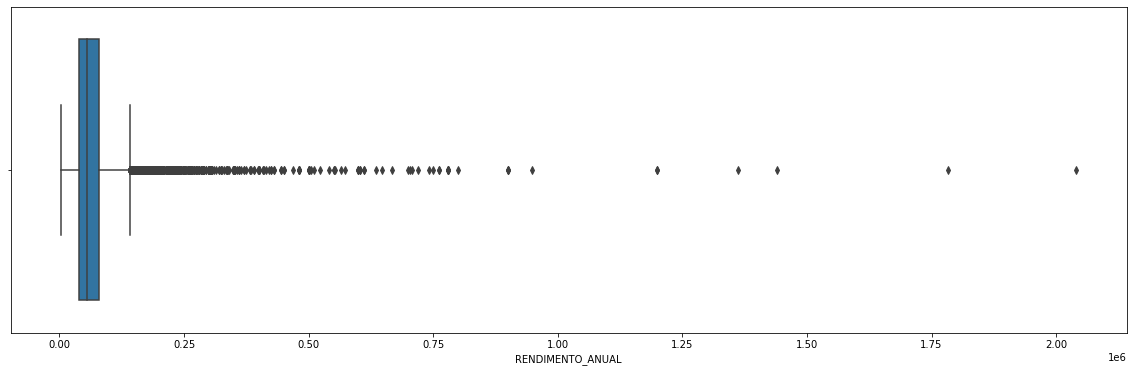

In [381]:
ax = sns.boxplot(x=dados['RENDIMENTO_ANUAL'])
ax.figure.set_size_inches(20, 6)

In [382]:
dados[dados['RENDIMENTO_ANUAL'] > 1000000]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
9073,42.0,2039784.0,Alugada,0.0,Empreendimento,C,8450.0,12.29,0.0,0.00,1.0,15
12606,47.0,1362000.0,Hipotecada,9.0,Empreendimento,A,6600.0,7.74,0.0,0.00,0.0,17
15434,36.0,1200000.0,Própria,16.0,Médico,A,10000.0,6.54,0.0,0.01,0.0,11
19815,63.0,1782000.0,Alugada,13.0,Educativo,C,12025.0,14.27,0.0,0.01,0.0,30
28515,32.0,1200000.0,Hipotecada,1.0,Empreendimento,A,12000.0,7.51,0.0,0.01,0.0,8
29934,44.0,1440000.0,Hipotecada,7.0,Pagamento de débitos,A,6400.0,7.40,0.0,0.00,0.0,15


Há pessoas com rendimento anual superior a 1 milhão. Não serão removidas.

#### ANOS_TRABALHADOS

In [383]:
dados['ANOS_TRABALHADOS'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  34.,
        38.,  41., 123.])

Há dois cidadãos que trabalharam por "123 anos", definitivamente são um outliers. 

In [384]:
dados[dados['ANOS_TRABALHADOS'] > 100]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
25055,22.0,59000.0,Alugada,123.0,Pessoal,D,35000.0,16.02,1.0,0.59,1.0,3
31592,21.0,192000.0,Hipotecada,123.0,Empreendimento,A,20000.0,6.54,0.0,0.10,0.0,4


In [385]:
dados = dados.drop(dados[dados['ANOS_TRABALHADOS'] > 120].index)
dados[dados['ANOS_TRABALHADOS'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO


#### VALOR_EMPRESTIMO

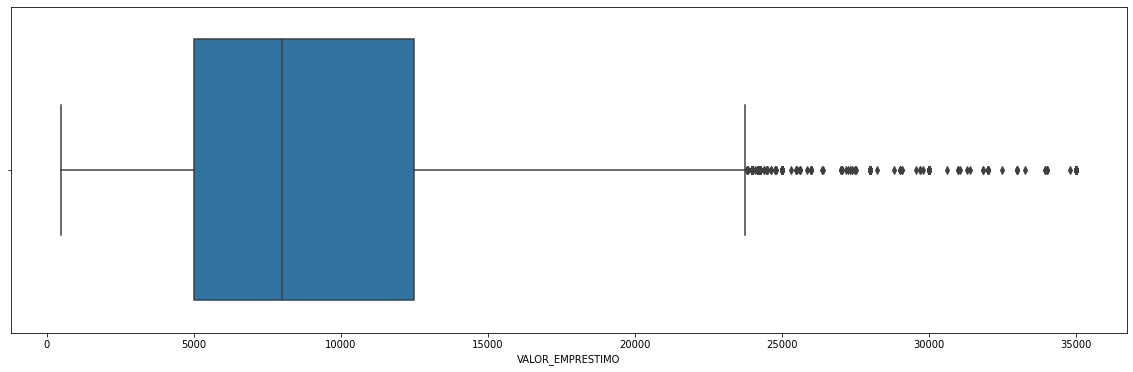

In [386]:
ax = sns.boxplot(x=dados['VALOR_EMPRESTIMO'])
ax.figure.set_size_inches(20, 6)

Não vejo nenhum problema em pegar empréstimos com valores elevados.

#### JUROS

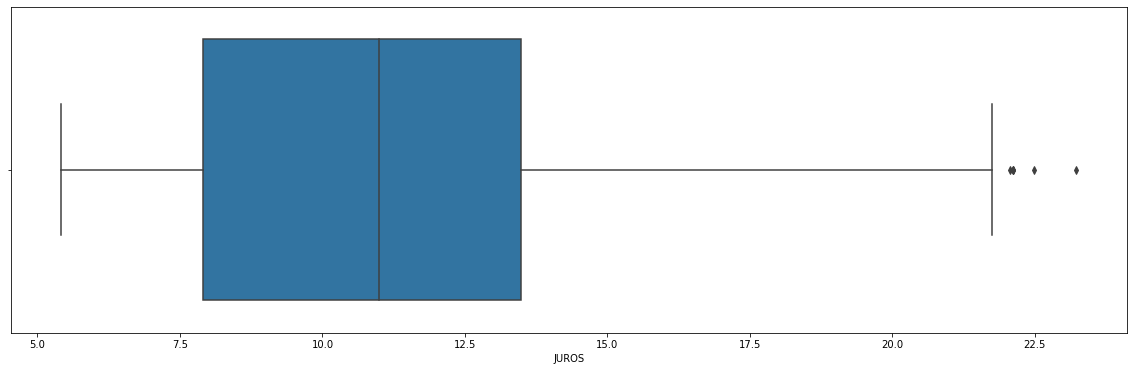

In [387]:
ax = sns.boxplot(x=dados['JUROS'])
ax.figure.set_size_inches(20, 6)

Nada anormal com os juros.

#### EMPRESTIMO_PERC_RENDA_ANUAL

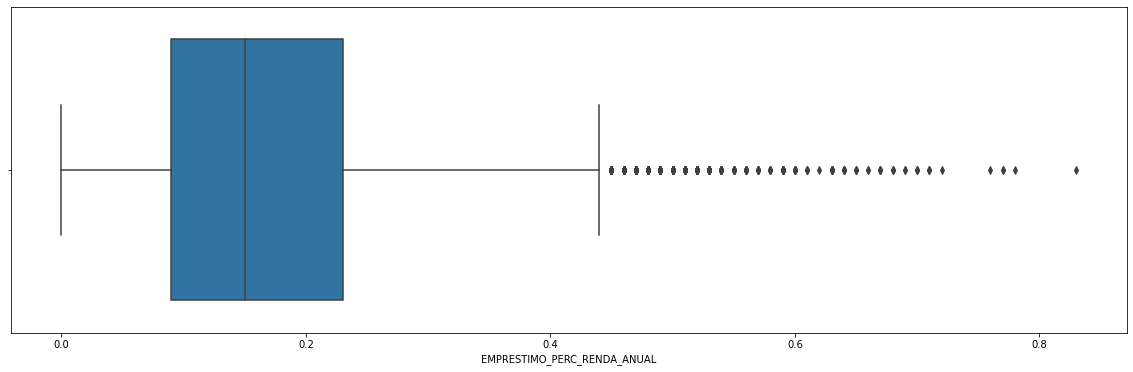

In [388]:
ax = sns.boxplot(x=dados['EMPRESTIMO_PERC_RENDA_ANUAL'])
ax.figure.set_size_inches(20, 6)

Nada anormal aqui.

#### ANOS_PRIMEIRO_CREDITO

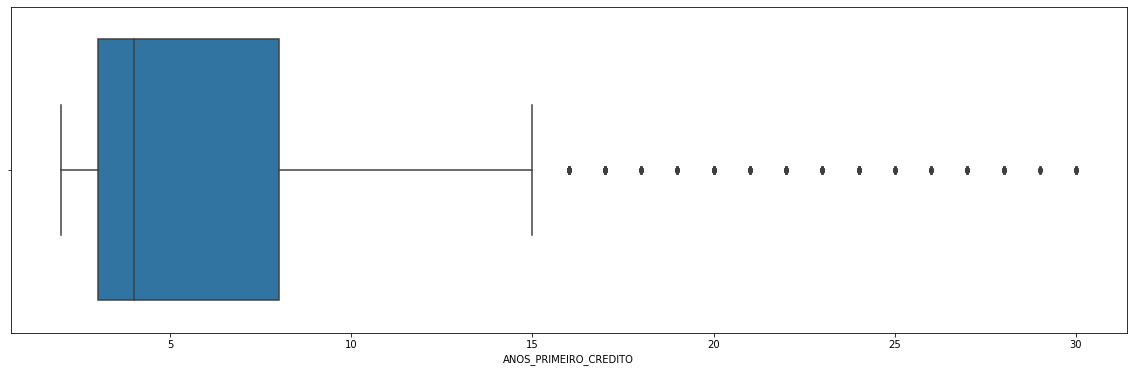

In [389]:
ax = sns.boxplot(x=dados['ANOS_PRIMEIRO_CREDITO'])
ax.figure.set_size_inches(20, 6)

Nada anormal aqui.

#### Resultado final

In [390]:
dados.shape

(28632, 12)

O resultado final é uma tabela com 28632 linhas e 12 colunas.

In [391]:
dados_brutos.shape[0]- dados.shape[0]

5853

5853 linhas foram eliminadas.

### Analisar a correlação das variáveis

In [392]:
dados.corr()

,IDADE,RENDIMENTO_ANUAL,ANOS_TRABALHADOS,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
IDADE,1.000000,0.141471,0.176054,0.056061,0.010370,-0.022498,-0.039476,0.009163,0.877581
RENDIMENTO_ANUAL,0.141471,1.000000,0.160952,0.324766,-0.003767,-0.167028,-0.297635,-0.001251,0.122787
ANOS_TRABALHADOS,0.176054,0.160952,1.000000,0.108390,-0.058263,-0.086486,-0.060099,-0.030400,0.151571
VALOR_EMPRESTIMO,0.056061,0.324766,0.108390,1.000000,0.145895,0.113363,0.577197,0.040060,0.045580
JUROS,0.010370,-0.003767,-0.058263,0.145895,1.000000,0.339307,0.123401,0.500233,0.015330
POSSIB_INADIMPLENCIA,-0.022498,-0.167028,-0.086486,0.113363,0.339307,1.000000,0.379534,0.181867,-0.015575
EMPRESTIMO_PERC_RENDA_ANUAL,-0.039476,-0.297635,-0.060099,0.577197,0.123401,0.379534,1.000000,0.035823,-0.029814
INADIMPLENTE,0.009163,-0.001251,-0.030400,0.040060,0.500233,0.181867,0.035823,1.000000,0.008484
ANOS_PRIMEIRO_CREDITO,0.877581,0.122787,0.151571,0.045580,0.015330,-0.015575,-0.029814,0.008484,1.000000


A coluna **EMPRESTIMO_PERC_RENDA_ANUAL** tem uma correlação alta com **VALOR_EMPRESTIMO** e estão diretamente relacionadas. Uma delas será removida para não haver duplicidade na hora de treinar o modelo.

In [393]:
dados = dados.drop('EMPRESTIMO_PERC_RENDA_ANUAL', axis = 1)

In [394]:
dados.columns

Index(['IDADE', 'RENDIMENTO_ANUAL', 'SITUACAO_PROPRIEDADE', 'ANOS_TRABALHADOS',
       'MOTIVO_EMPRESTIMO', 'PONTUACAO', 'VALOR_EMPRESTIMO', 'JUROS',
       'POSSIB_INADIMPLENCIA', 'INADIMPLENTE', 'ANOS_PRIMEIRO_CREDITO'],
      dtype='object')

In [395]:
#sns.pairplot(dados, hue='INADIMPLENTE', markers=["o", "s"], palette='Dark2')

A coluna **INADIPLENTE** é a nossa variável alvo. Essa coluna será separada.

In [396]:
x = dados.drop(['INADIMPLENTE'], axis = 1)
alvo = dados['INADIMPLENTE']

Para variáveis categóricas será utilizada um outra abordagem.
Faremos a criação dessas novas colunas com o **OneHotEncoder**.

In [397]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [398]:
colunas_categoricas = ['SITUACAO_PROPRIEDADE','MOTIVO_EMPRESTIMO','PONTUACAO']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(), colunas_categoricas),
    remainder='passthrough')

dados2 = one_hot_enc.fit_transform(x)
dados2 = pd.DataFrame(dados2, columns=one_hot_enc.get_feature_names_out())
dados2.head()

,onehotencoder__SITUACAO_PROPRIEDADE_Alugada,onehotencoder__SITUACAO_PROPRIEDADE_Hipotecada,onehotencoder__SITUACAO_PROPRIEDADE_Outros,onehotencoder__SITUACAO_PROPRIEDADE_Própria,onehotencoder__MOTIVO_EMPRESTIMO_Educativo,onehotencoder__MOTIVO_EMPRESTIMO_Empreendimento,onehotencoder__MOTIVO_EMPRESTIMO_Melhora do lar,onehotencoder__MOTIVO_EMPRESTIMO_Médico,onehotencoder__MOTIVO_EMPRESTIMO_Pagamento de débitos,onehotencoder__MOTIVO_EMPRESTIMO_Pessoal,...,onehotencoder__PONTUACAO_E,onehotencoder__PONTUACAO_F,onehotencoder__PONTUACAO_G,remainder__IDADE,remainder__RENDIMENTO_ANUAL,remainder__ANOS_TRABALHADOS,remainder__VALOR_EMPRESTIMO,remainder__JUROS,remainder__POSSIB_INADIMPLENCIA,remainder__ANOS_PRIMEIRO_CREDITO
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,25.0,58020.0,9.0,2000.0,6.91,0.0,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,28.0,61000.0,9.0,25000.0,9.91,1.0,7.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,45000.0,3.0,5000.0,12.42,0.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,29.0,35000.0,12.0,1800.0,5.42,0.0,7.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,26.0,87000.0,9.0,25000.0,12.73,0.0,2.0


### Normalização

Os dados tem escalas diferentes, serão colocados numa mesma escala.

In [399]:
from sklearn.preprocessing import MinMaxScaler

In [400]:
scaler = MinMaxScaler()
scaler.fit(dados2)
MinMaxScaler()

MinMaxScaler()

In [401]:
dados2 = scaler.transform(dados2)
dados2 = pd.DataFrame(dados2, columns = one_hot_enc.get_feature_names_out())
dados2

,onehotencoder__SITUACAO_PROPRIEDADE_Alugada,onehotencoder__SITUACAO_PROPRIEDADE_Hipotecada,onehotencoder__SITUACAO_PROPRIEDADE_Outros,onehotencoder__SITUACAO_PROPRIEDADE_Própria,onehotencoder__MOTIVO_EMPRESTIMO_Educativo,onehotencoder__MOTIVO_EMPRESTIMO_Empreendimento,onehotencoder__MOTIVO_EMPRESTIMO_Melhora do lar,onehotencoder__MOTIVO_EMPRESTIMO_Médico,onehotencoder__MOTIVO_EMPRESTIMO_Pagamento de débitos,onehotencoder__MOTIVO_EMPRESTIMO_Pessoal,...,onehotencoder__PONTUACAO_E,onehotencoder__PONTUACAO_F,onehotencoder__PONTUACAO_G,remainder__IDADE,remainder__RENDIMENTO_ANUAL,remainder__ANOS_TRABALHADOS,remainder__VALOR_EMPRESTIMO,remainder__JUROS,remainder__POSSIB_INADIMPLENCIA,remainder__ANOS_PRIMEIRO_CREDITO
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.078125,0.026535,0.219512,0.043478,0.083708,0.0,0.071429
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.125000,0.027999,0.219512,0.710145,0.252247,1.0,0.178571
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.031250,0.020140,0.073171,0.130435,0.393258,0.0,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.140625,0.015228,0.292683,0.037681,0.000000,0.0,0.178571
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.093750,0.040771,0.219512,0.710145,0.410674,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28627,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.156250,0.025052,0.341463,0.443478,0.522472,0.0,0.250000
28628,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.171875,0.031439,0.365854,0.159420,0.310674,0.0,0.250000
28629,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.140625,0.044700,0.000000,0.159420,0.341011,0.0,0.178571
28630,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.203125,0.042244,0.121951,0.107246,0.197753,0.0,0.142857


### Separação dos dados de teste e treino

In [402]:
SEED = 144
from sklearn.model_selection import train_test_split
x_treino, x_teste, alvo_treino, alvo_teste = train_test_split(dados2, alvo, random_state = SEED, stratify = alvo)
alvo_treino

20208    1.0
126      0.0
10353    1.0
3544     0.0
32962    0.0
        ... 
25330    0.0
22857    0.0
14016    1.0
22103    0.0
19593    0.0
Name: INADIMPLENTE, Length: 21474, dtype: float64

Modelo

In [403]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

Métricas

In [404]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.colors

### Balanceamento na variável alvo

O Oversampling consiste em criar sinteticamente novas observações da classe minoritária, com o objetivo de igualar a proporção das categorias.

In [405]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = SEED)
X_balanceado_over, alvo_balanceado_over = smote.fit_resample(x_treino, alvo_treino)
X_balanceado_over

,onehotencoder__SITUACAO_PROPRIEDADE_Alugada,onehotencoder__SITUACAO_PROPRIEDADE_Hipotecada,onehotencoder__SITUACAO_PROPRIEDADE_Outros,onehotencoder__SITUACAO_PROPRIEDADE_Própria,onehotencoder__MOTIVO_EMPRESTIMO_Educativo,onehotencoder__MOTIVO_EMPRESTIMO_Empreendimento,onehotencoder__MOTIVO_EMPRESTIMO_Melhora do lar,onehotencoder__MOTIVO_EMPRESTIMO_Médico,onehotencoder__MOTIVO_EMPRESTIMO_Pagamento de débitos,onehotencoder__MOTIVO_EMPRESTIMO_Pessoal,...,onehotencoder__PONTUACAO_E,onehotencoder__PONTUACAO_F,onehotencoder__PONTUACAO_G,remainder__IDADE,remainder__RENDIMENTO_ANUAL,remainder__ANOS_TRABALHADOS,remainder__VALOR_EMPRESTIMO,remainder__JUROS,remainder__POSSIB_INADIMPLENCIA,remainder__ANOS_PRIMEIRO_CREDITO
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.140625,0.031438,0.341463,0.420290,0.410674,0.0,0.142857
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.062500,0.038314,0.195122,0.159420,0.075281,0.0,0.035714
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.046875,0.020876,0.000000,0.275362,0.496629,1.0,0.035714
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.593750,0.381180,0.170732,0.115942,0.083708,0.0,0.642857
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.046875,0.019650,0.170732,0.478261,0.067416,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35291,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.052614,0.032893,0.115477,0.398999,0.452660,0.0,0.022598
35292,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.088735,0.056537,0.080999,0.275362,0.450425,0.0,0.035714
35293,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.232403,0.020824,0.083844,0.068488,0.574645,0.0,0.310259
35294,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.078125,0.020984,0.203926,0.363520,0.512439,1.0,0.045646


O undersampling remova aleatoriamente registros da classe mais frequente, igualando a quantidade de registros das duas classes.

In [406]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=SEED,sampling_strategy=0.5)
X_balanceado_under, alvo_balanceado_under = under.fit_resample(x_treino, alvo_treino)
X_balanceado_under

,onehotencoder__SITUACAO_PROPRIEDADE_Alugada,onehotencoder__SITUACAO_PROPRIEDADE_Hipotecada,onehotencoder__SITUACAO_PROPRIEDADE_Outros,onehotencoder__SITUACAO_PROPRIEDADE_Própria,onehotencoder__MOTIVO_EMPRESTIMO_Educativo,onehotencoder__MOTIVO_EMPRESTIMO_Empreendimento,onehotencoder__MOTIVO_EMPRESTIMO_Melhora do lar,onehotencoder__MOTIVO_EMPRESTIMO_Médico,onehotencoder__MOTIVO_EMPRESTIMO_Pagamento de débitos,onehotencoder__MOTIVO_EMPRESTIMO_Pessoal,...,onehotencoder__PONTUACAO_E,onehotencoder__PONTUACAO_F,onehotencoder__PONTUACAO_G,remainder__IDADE,remainder__RENDIMENTO_ANUAL,remainder__ANOS_TRABALHADOS,remainder__VALOR_EMPRESTIMO,remainder__JUROS,remainder__POSSIB_INADIMPLENCIA,remainder__ANOS_PRIMEIRO_CREDITO
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.218750,0.012771,0.048780,0.419565,0.399438,1.0,0.285714
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.312500,0.044700,0.292683,0.130435,0.293820,0.0,0.321429
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.125000,0.037612,0.048780,0.101449,0.236517,0.0,0.178571
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.093750,0.058209,0.024390,0.275362,0.293820,0.0,0.000000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.078125,0.018666,0.000000,0.200000,0.612360,1.0,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11473,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.125000,0.013754,0.000000,0.144928,0.592135,0.0,0.214286
11474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.109375,0.012182,0.146341,0.130435,0.535955,0.0,0.107143
11475,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.046875,0.029964,0.000000,0.231884,0.551124,0.0,0.035714
11476,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.031250,0.020631,0.048780,0.565217,0.594382,1.0,0.071429


### Modelos

#### SVM (Oversampling)

In [407]:
from sklearn import svm #Support Vector Machine
from sklearn.model_selection import train_test_split # separar os dados entre dados de treino e teste

In [408]:
# SVM regularization parameter
svm = svm.SVC(kernel='linear', C=1.0, random_state=SEED)
svm.fit(X_balanceado_over, alvo_balanceado_over) # modelar com os dados de treino
# previsão
svm.predict(x_teste)
previsao_svm = svm.predict(x_teste)
svm.score(x_teste, previsao_svm) # acurácia

1.0

In [409]:
print(classification_report(alvo_teste, previsao_svm)) # matriz de confusão

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      5882
         1.0       0.50      1.00      0.67      1276

    accuracy                           0.82      7158
   macro avg       0.75      0.89      0.77      7158
weighted avg       0.91      0.82      0.84      7158



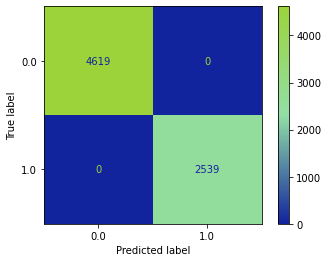

In [410]:
mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#12239e","#92dfa6","#9cd33b"])
ConfusionMatrixDisplay.from_estimator(svm, x_teste, previsao_svm, cmap = mapa_calor)
plt.grid(False)
plt.show()

#### Árvore de Decisão (Oversampling)

In [411]:
arvore = DecisionTreeClassifier(random_state=SEED)
arvore.fit(X_balanceado_over, alvo_balanceado_over)
previsao_arvore = arvore.predict(x_teste)

In [412]:
print(classification_report(alvo_teste, previsao_arvore))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      5882
         1.0       0.52      0.53      0.52      1276

    accuracy                           0.83      7158
   macro avg       0.71      0.71      0.71      7158
weighted avg       0.83      0.83      0.83      7158



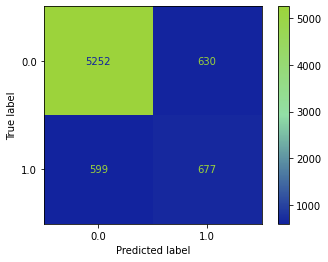

In [413]:
mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#12239e","#92dfa6","#9cd33b"])
ConfusionMatrixDisplay.from_estimator(arvore, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

#### Gradient Boosting (Oversampling)

In [414]:
gboost = GradientBoostingClassifier(random_state=SEED)
gboost.fit(X_balanceado_over, alvo_balanceado_over)
previsao_gboost = gboost.predict(x_teste)
print(classification_report(alvo_teste, previsao_gboost))

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      5882
         1.0       0.50      0.97      0.66      1276

    accuracy                           0.82      7158
   macro avg       0.75      0.88      0.77      7158
weighted avg       0.90      0.82      0.84      7158



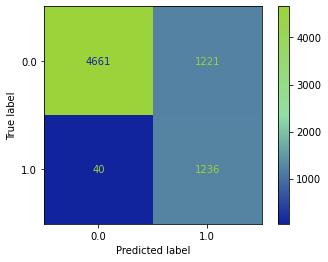

In [415]:
ConfusionMatrixDisplay.from_estimator(gboost, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

#### Regressão Logística (Oversampling)

In [416]:
reg_logistica = LogisticRegression(random_state=SEED, max_iter =1000)
reg_logistica.fit(X_balanceado_over, alvo_balanceado_over)
previsao_reglog = reg_logistica.predict(x_teste)
print(classification_report(alvo_teste, previsao_reglog))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      5882
         1.0       0.50      1.00      0.67      1276

    accuracy                           0.82      7158
   macro avg       0.75      0.89      0.77      7158
weighted avg       0.91      0.82      0.84      7158



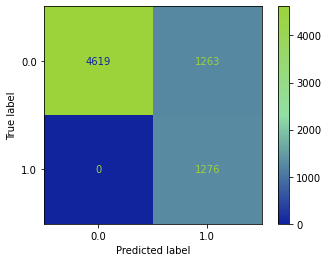

In [417]:
ConfusionMatrixDisplay.from_estimator(reg_logistica, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

#### KNN (Oversampling)

In [419]:
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors
from sklearn import metrics

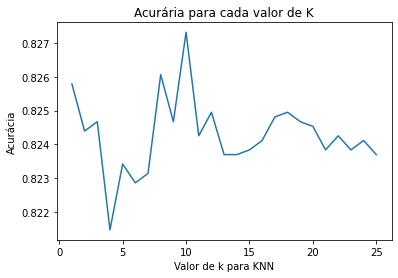

In [420]:
# experimentar diferentes valores para K
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_balanceado_over, alvo_balanceado_over)
    previsao_knn = knn.predict(x_teste)
    scores.append(metrics.accuracy_score(alvo_teste, previsao_knn))
    
plt.plot(k_range, scores)
plt.xlabel('Valor de k para KNN')
plt.ylabel('Acurácia')
plt.title('Acurária para cada valor de K')
plt.show()

In [421]:
# modelar com os dados de treino
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_balanceado_over, alvo_balanceado_over)
previsao_knn = knn.predict(x_teste) # previsão
metrics.accuracy_score(alvo_teste, previsao_knn)  # acurácia
print(classification_report(alvo_teste, previsao_knn)) # matriz de confusão

              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88      5882
         1.0       0.51      0.94      0.66      1276

    accuracy                           0.83      7158
   macro avg       0.75      0.87      0.77      7158
weighted avg       0.90      0.83      0.84      7158



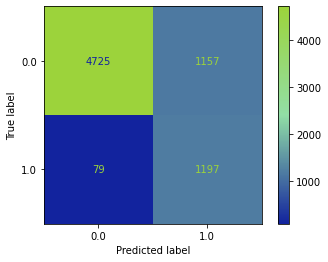

In [422]:
ConfusionMatrixDisplay.from_estimator(knn, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

In [442]:
from sklearn.metrics import recall_score
metricas_over = pd.DataFrame({
    'Acurácia treino':[    
        svm.score(x_treino, alvo_treino),
        arvore.score(x_treino, alvo_treino),
        gboost.score(x_treino, alvo_treino),
        reg_logistica.score(x_treino, alvo_treino),
        knn.score(x_treino, alvo_treino)],
    'Acurácia teste': [
        svm.score(x_teste, alvo_teste),
        arvore.score(x_teste, alvo_teste), 
        gboost.score(x_teste, alvo_teste), 
        reg_logistica.score(x_teste, alvo_teste),
        knn.score(x_teste, alvo_teste)],
    'Recall':[
        recall_score(alvo_teste, previsao_svm),
        recall_score(alvo_teste, previsao_arvore),
        recall_score(alvo_teste, previsao_gboost),
        recall_score(alvo_teste, previsao_reglog),
        recall_score(alvo_teste, previsao_knn)]},
    index = ['SVM Oversampling', 'Árvore de Decisão Oversampling', 'Gradient Boosting Oversampling', 'Regressão Logísitica Oversampling', 'KNN Oversampling'])

#### SVM (Undesampling)

In [423]:
from sklearn import svm #Support Vector Machine
from sklearn.model_selection import train_test_split # separar os dados entre dados de treino e teste

In [424]:
# SVM regularization parameter
svm = svm.SVC(kernel='linear', C=1.0, random_state=SEED)
svm.fit(X_balanceado_under, alvo_balanceado_under) # modelar com os dados de treino
# previsão
svm.predict(x_teste)
previsao_svm = svm.predict(x_teste)
svm.score(x_teste, previsao_svm) # acurácia

1.0

In [425]:
print(classification_report(alvo_teste, previsao_svm)) # matriz de confusão

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      5882
         1.0       0.50      1.00      0.67      1276

    accuracy                           0.82      7158
   macro avg       0.75      0.89      0.77      7158
weighted avg       0.91      0.82      0.84      7158



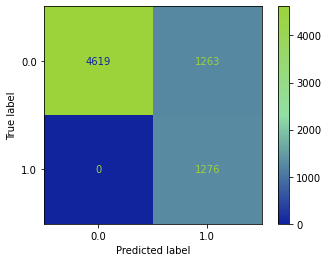

In [426]:
mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#12239e","#92dfa6","#9cd33b"])
ConfusionMatrixDisplay.from_estimator(svm, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

#### Árvore de Decisão (Undesampling)

In [427]:
arvore = DecisionTreeClassifier(random_state=SEED)
arvore.fit(X_balanceado_under, alvo_balanceado_under)
previsao_arvore = arvore.predict(x_teste)
print(classification_report(alvo_teste, previsao_arvore))

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89      5882
         1.0       0.51      0.68      0.58      1276

    accuracy                           0.82      7158
   macro avg       0.72      0.77      0.73      7158
weighted avg       0.85      0.82      0.83      7158



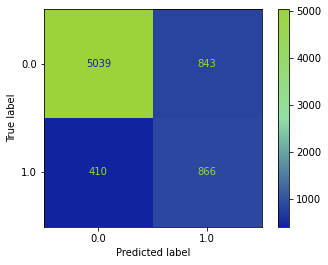

In [428]:
ConfusionMatrixDisplay.from_estimator(arvore, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

#### Gradient Boosting (Undersampling)

In [429]:
gboost = GradientBoostingClassifier(random_state=SEED)
gboost.fit(X_balanceado_under, alvo_balanceado_under)
previsao_gboost = gboost.predict(x_teste)
print(classification_report(alvo_teste, previsao_gboost))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      5882
         1.0       0.50      0.99      0.67      1276

    accuracy                           0.82      7158
   macro avg       0.75      0.89      0.77      7158
weighted avg       0.91      0.82      0.84      7158



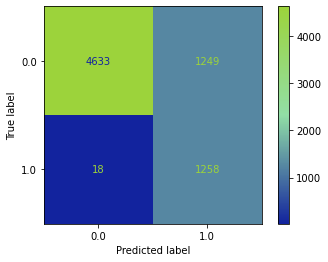

In [430]:
ConfusionMatrixDisplay.from_estimator(gboost, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

#### Regressão Logística (Undersampling)

In [431]:
reg_logistica = LogisticRegression(random_state=SEED, max_iter =1000)
reg_logistica.fit(X_balanceado_under, alvo_balanceado_under)
previsao_reglog = reg_logistica.predict(x_teste)
print(classification_report(alvo_teste, previsao_reglog))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      5882
         1.0       0.50      1.00      0.67      1276

    accuracy                           0.82      7158
   macro avg       0.75      0.89      0.77      7158
weighted avg       0.91      0.82      0.84      7158



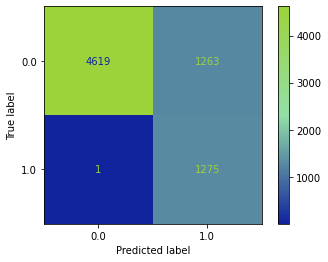

In [432]:
ConfusionMatrixDisplay.from_estimator(reg_logistica, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

#### KNN (Undersampling)

In [433]:
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors
from sklearn import metrics

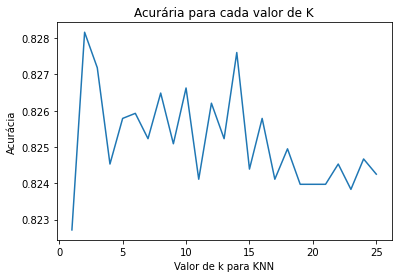

In [434]:
# experimentar diferentes valores para K
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_balanceado_under, alvo_balanceado_under)
    previsao_knn = knn.predict(x_teste)
    scores.append(metrics.accuracy_score(alvo_teste, previsao_knn))
    
plt.plot(k_range, scores)
plt.xlabel('Valor de k para KNN')
plt.ylabel('Acurácia')
plt.title('Acurária para cada valor de K')
plt.show()

In [435]:
# modelar com os dados de treino
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_balanceado_under, alvo_balanceado_under)
previsao_knn = knn.predict(x_teste) # previsão
metrics.accuracy_score(alvo_teste, previsao_knn)  # acurácia
print(classification_report(alvo_teste, previsao_knn)) # matriz de confusão

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.89      5882
         1.0       0.51      0.88      0.64      1276

    accuracy                           0.83      7158
   macro avg       0.74      0.85      0.76      7158
weighted avg       0.89      0.83      0.84      7158



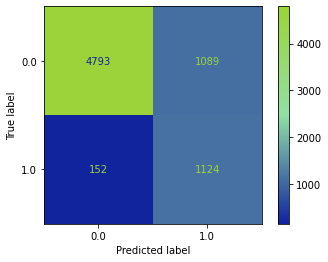

In [436]:
ConfusionMatrixDisplay.from_estimator(knn, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

### Avaliação dos modelos

In [443]:
from sklearn.metrics import recall_score
metricas_under = pd.DataFrame({
    'Acurácia treino':[    
        svm.score(x_treino, alvo_treino),
        arvore.score(x_treino, alvo_treino),
        gboost.score(x_treino, alvo_treino),
        reg_logistica.score(x_treino, alvo_treino),
        knn.score(x_treino, alvo_treino)],
    'Acurácia teste': [
        svm.score(x_teste, alvo_teste),
        arvore.score(x_teste, alvo_teste), 
        gboost.score(x_teste, alvo_teste), 
        reg_logistica.score(x_teste, alvo_teste),
        knn.score(x_teste, alvo_teste)],
    'Recall':[
        recall_score(alvo_teste, previsao_svm),
        recall_score(alvo_teste, previsao_arvore),
        recall_score(alvo_teste, previsao_gboost),
        recall_score(alvo_teste, previsao_reglog),
        recall_score(alvo_teste, previsao_knn)]},
    index = ['SVM Undersampling', 'Árvore de Decisão Undersampling', 'Gradient Boosting Undersampling', 'Regressão Logísitica Undersampling', 'KNN Undersampling'])

In [444]:
display(metricas_over,metricas_under)

,Acurácia treino,Acurácia teste,Recall
SVM Oversampling,0.826907,0.823554,1.000000
Árvore de Decisão Oversampling,0.934060,0.824951,0.678683
Gradient Boosting Oversampling,0.829654,0.822995,0.985893
Regressão Logísitica Oversampling,0.826954,0.823414,0.999216
KNN Oversampling,0.841855,0.826628,0.880878


,Acurácia treino,Acurácia teste,Recall
SVM Undersampling,0.826907,0.823554,1.000000
Árvore de Decisão Undersampling,0.934060,0.824951,0.678683
Gradient Boosting Undersampling,0.829654,0.822995,0.985893
Regressão Logísitica Undersampling,0.826954,0.823414,0.999216
KNN Undersampling,0.841855,0.826628,0.880878


### Otimização de hiperparâmetros

## Notebook WIP...